# Ford GoBike Trip July 2018 Data Analysis
## by Lauriston Nunes

## Preliminary Wrangling

> This document explores a dataset containing trip duration and additional attributes for approximately 199,222 bike trips for the Ford GoBike bike share system for the month of July 2018.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import radians, sin, cos, acos

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe, print statistics
trip_data = pd.read_csv('201807-fordgobike-tripdata.csv')

In [20]:
# high-level overview of data shape and composition
print(trip_data.shape)
print(trip_data.dtypes)
print(trip_data.head(12))

(199222, 16)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object
    duration_sec              start_time                end_time  \
0          59989 2018-07-31 18:20:32.723 2018-08-01 11:00:22.189   
1          60232 2018-07-31 17:24:26.235 2018-08-01 10:08:18.752   
2          43864 2018-07-31 21:03:26.703 2018-08-01 09:14:30.834   
3          51522 2018-07-31 1

In [5]:
# Convert start_time and end_time to datetime64 data type
trip_data['start_time']= pd.to_datetime(trip_data['start_time'])
trip_data['end_time']= pd.to_datetime(trip_data['end_time'])

# drop start_station_id/end_station_id if null
trip_data["start_station_id"].isna().sum()
trip_data = trip_data.dropna(axis=0, subset=['start_station_id'])


# Convert start_station_id to int
trip_data = trip_data.astype({"start_station_id": int})
# Convert end_station_id to int
trip_data = trip_data.astype({"end_station_id": int})


# Convert member_birth_year to int
trip_data = trip_data.dropna(axis=0, subset=['member_birth_year'])
trip_data = trip_data.astype({"member_birth_year": int})


# user_type should have a categorical data type
trip_data.user_type = trip_data.user_type.astype('category', ordered=True)

# member_gender should have a categorical data type
trip_data.member_gender = trip_data.member_gender.astype('category', ordered=True)

# member_gender should have a categorical data type
trip_data.bike_share_for_all_trip = trip_data.bike_share_for_all_trip.astype('category', ordered=True)
trip_data.head(20)
print(trip_data.shape)
print(trip_data.info())
print(trip_data.describe())

/Users/lauriston.nunes/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


(183694, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183694 entries, 0 to 199221
Data columns (total 16 columns):
duration_sec               183694 non-null int64
start_time                 183694 non-null datetime64[ns]
end_time                   183694 non-null datetime64[ns]
start_station_id           183694 non-null int64
start_station_name         183694 non-null object
start_station_latitude     183694 non-null float64
start_station_longitude    183694 non-null float64
end_station_id             183694 non-null int64
end_station_name           183694 non-null object
end_station_latitude       183694 non-null float64
end_station_longitude      183694 non-null float64
bike_id                    183694 non-null int64
user_type                  183694 non-null category
member_birth_year          183694 non-null int64
member_gender              183694 non-null category
bike_share_for_all_trip    183694 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int

### What is the structure of your dataset?

> There are 183,694 bike trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip). About half of the  variables are numeric in nature, however we also have date_time objects (start_time, end_time), categorical objects (user_type, bike_share_for_all_trip), and string objects (start_station_name, end_station_name). I removed records with a null start_station_id and records with a null member_birth_year so that I could change the data type and remove the records with missing information that will be needed for analysis.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out who is using the Ford GoBike service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that member_birth_year, user_type, member_gender will be the main features that help me figure out what kind of users are using the Ford GoBike service.  



## Univariate Exploration

> I'll start by breaking down the categories: user_type, member_gender, and bike_share_for_all_trip

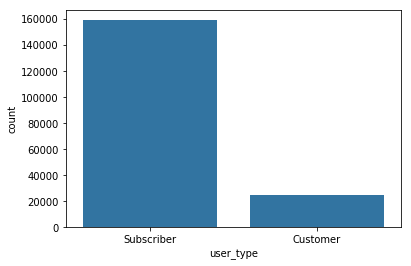

In [7]:
base_color = sb.color_palette()[0]
cat_order = trip_data['user_type'].value_counts().index
sb.countplot(data = trip_data, x = 'user_type', color = base_color, order = cat_order)

Here we see that the majority of users are subscribers. Let's break the user base down by gender next.

Male      133329
Female     47272
Other       3093
Name: member_gender, dtype: int64

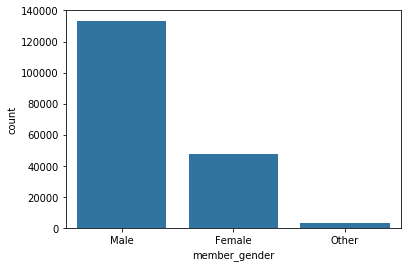

In [8]:
cat_order = trip_data['member_gender'].value_counts().index
sb.countplot(data = trip_data, x = 'member_gender', color = base_color, order = cat_order)
trip_data['member_gender'].value_counts()

According to the graph, there are a significant amount more male users of the bike service than female or other. Next, let's break the data down by users that are using bike share for the whole trip. 

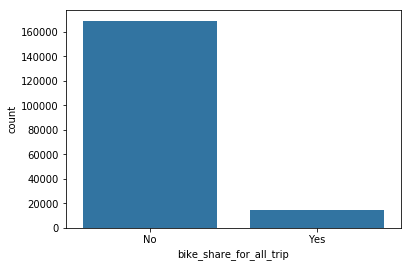

In [112]:
cat_order =trip_data.bike_share_for_all_trip.value_counts().index
sb.countplot(data = trip_data, x = 'bike_share_for_all_trip', color = base_color, order = cat_order)

Here we can see that people are only using the bike share program for portions of their trip. Now lets's see how old these users are.

(1930, 2020)

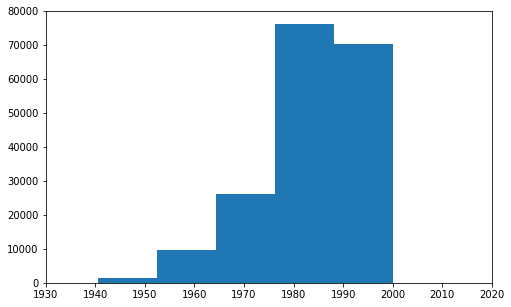

In [105]:
plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'member_birth_year')
plt.xlim([1930,2020])

In [111]:
trip_data.query('member_birth_year == 1881')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
61419,824,2018-07-22 20:12:41.671,2018-07-22 20:26:26.447,107,17th St at Dolores St,37.763015,-122.426497,73,Pierce St at Haight St,37.771793,-122.433708,1128,Customer,1881,Male,No,1.163102
63351,839,2018-07-22 14:10:11.007,2018-07-22 14:24:10.937,126,Esprit Park,37.761634,-122.390648,36,Folsom St at 3rd St,37.783830,-122.398870,4062,Customer,1881,Male,No,2.570067
63482,376,2018-07-22 13:52:17.738,2018-07-22 13:58:34.517,355,23rd St at Tennessee St,37.755367,-122.388795,126,Esprit Park,37.761634,-122.390648,4062,Customer,1881,Male,No,0.715207
63823,1331,2018-07-22 12:35:04.305,2018-07-22 12:57:15.319,109,17th St at Valencia St,37.763316,-122.421904,355,23rd St at Tennessee St,37.755367,-122.388795,4062,Customer,1881,Male,No,3.039917
63974,4736,2018-07-22 11:13:26.307,2018-07-22 12:32:22.476,70,Central Ave at Fell St,37.773311,-122.444293,109,17th St at Valencia St,37.763316,-122.421904,2618,Customer,1881,Male,No,2.258672


Majority of the user base are people born in the late 70s up to 2000, or Generation Xers and Milennials. Outliers are probably due to people using fake birth days when registering.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I trimmed the historgram down between the years of 1930 and 2020 since it's less likely that someone from 1900 or earlier is alive or actively riding a bike and more likely that someone entered in false data. Other than that the data looked accurate to me. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The member_birth_year variable has a mininum value of 1881.  I didn't remove values less than 1930 since other attributes like the latitude and longitude and start and end stations are likely to be accurate and useful for other analyses.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration). Now lets investigate relationhips between pairs of variables.

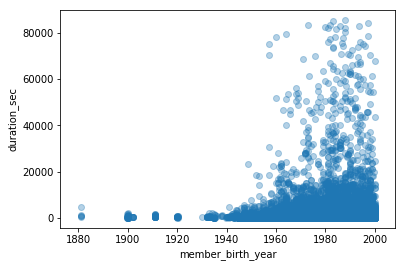

In [57]:
sb.regplot(data = trip_data, x = 'member_birth_year', y = 'duration_sec', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

Based on the above, people born in 1960 on up are spending a decent amount of time on the rental bikes. Now let's investigate if distance and duration_sec are related. 

In [118]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


trip_data['distance'] = haversine_np(trip_data['start_station_longitude'],trip_data['start_station_latitude'],trip_data['end_station_longitude'],trip_data['end_station_latitude'])

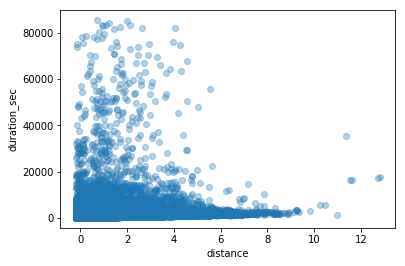

In [119]:
sb.regplot(data = trip_data, x = 'distance', y = 'duration_sec', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

I would have expected a positive relationship between distance and duration_sec, but it seems to be the opposite. People going shorter distances held on to their bikes longer, while people go further distances turned them in quicker.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

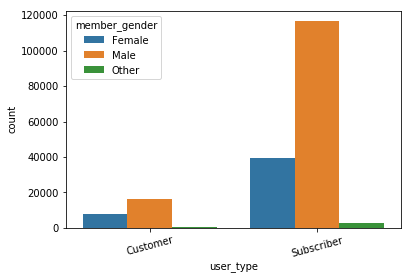

In [59]:
sb.countplot(data = trip_data, x = 'user_type', hue = 'member_gender')
plt.xticks(rotation = 15)

There are more male subscribers and customers than female or other. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

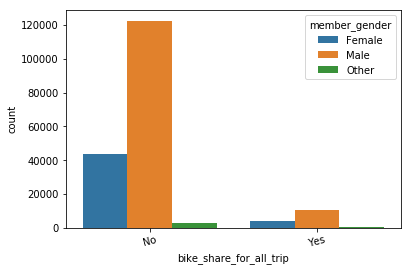

In [66]:
sb.countplot(data = trip_data, x = 'bike_share_for_all_trip', hue = 'member_gender')
plt.xticks(rotation = 15)


There are more males that don't use and do use the bike share for the whole trip than female or other. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationships for the main features of interest were pretty accurate based on what we saw in the univariate exploration. Since the population of users is majority male, the count plots between member_gender vs bike_share_for_all_trip/user_type were accurate.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most interesting relationship I found was that duration and distance were more inversely related than directly related. I calculated the distance by using the haversine formula, which determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Initially I thought bikes would be rented longer for  longer trips. However, it seems they were rented longer for shorter trips. Another future investigation we could make is adding in the station variable to confirm this behaviour. 

## Multivariate Exploration

> The main thing I'm going to explore here is how member_birth_year, duration_sec, and distance are related.

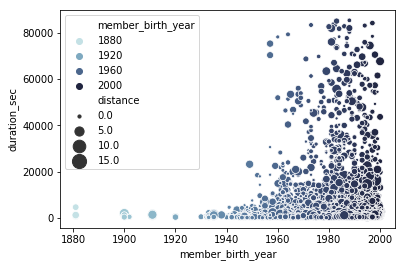

In [104]:
cmap = sb.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sb.scatterplot(x="member_birth_year", y="duration_sec",
                     size="distance", hue="member_birth_year",
                     palette=cmap, sizes=(10, 200),
                     data=trip_data)

Here we can see the positive trend between age and duration of rentals. We can also see how the distances are distributed with the circles.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The above scatterplot with continuous size and hue shows the Ford GoBike population from older to younger. There is a positive trend between age and duration of rentals, signifying that younger renters are renting for longer periods of time. We can also see the distance. While this varies, generally younger people are biking further. We also see that there is generally an inverse relationship between distance and duration with a greater amount of larger circles that have lower durations.  

### Were there any interesting or surprising interactions between features?

> There weren't any suprising interatctions between the features besides the distance and duration. However, it is possible to do a deeper dive into this data to gain more insights. 